# 1. Dependencies

In [ ]:
import gym
import ale_py 
import random

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

import torch
import torch.nn as nn

# 2. Environment

In [ ]:
from utils.wrapper import make_atari_env

env_id = "PongNoFrameskip-v4"
env = make_atari_env(env_id)
env.seed(31)

# 3. Hyperparameters

In [ ]:
args = {}

# gpu
args["USE_GPU"] = torch.cuda.is_available()
args["GPU_NUM"] = 0
args["device"] = torch.device(f'cuda:{args["GPU_NUM"]}' if args["USE_GPU"] else 'cpu')

# replay buffer
args["replay_buffer_capacity"] = 50000
args["replay_initial"] = 10000
args["batch_size"] = 32

# epsilon (experience rate)
args["eps_start"] = 1
args["eps_end"] = 0.01
args["eps_dec_frame"] = 3e5
args["eps_type"] = "exp"

# train
args["frame_num"] = 1400000
args["learning_rate"] = 0.0001
args["discount_factor"] = 0.99
args["update_duration"] = 1000
args["model_path"] = "./pretrained_dqn/"

# 4. Epsilon Greedy Function

In [ ]:
from utils.epsilon_greedy import EpsilonGenerator

eps = EpsilonGenerator(
    start=args["eps_start"], end=args["eps_end"],
    frame_num=args["eps_dec_frame"], ftype=args["eps_type"])
# our epsilon generator
epsilon = lambda frame : eps.epsilon(frame) if frame < args["eps_dec_frame"] else args["eps_end"]

plt.plot([epsilon(i) for i in range(args["frame_num"])])

# 5. Train

In [ ]:
from agent.dqn_agent import DqnAgent

from function_approximator.atari_dqn import AtariDQN
from function_approximator.atari_duel_dqn import AtariDuelDQN

from utils.replay.replayer import Replay

Succeed making sketch book


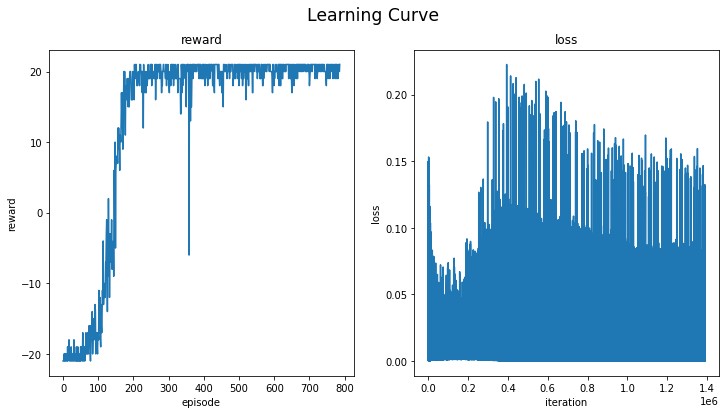

In [ ]:
replay_buffer = Replay(capacity=args["replay_buffer_capacity"])

args["model_name"] = "dqn"
dqn_agent = DqnAgent(env=env, q_val=AtariDQN, replay_buffer=replay_buffer, epsilon=epsilon, args=args)
dqn_agent.training()

In [ ]:
replay_buffer = Replay(capacity=args["replay_buffer_capacity"])

args["model_name"] = "duel_dqn"
duel_dqn_agent = DqnAgent(env=env, q_val=AtariDuelDQN, replay_buffer=replay_buffer, epsilon=epsilon, args=args)
duel_dqn_agent.training()